In [173]:
import pandas as pd
import numpy as np

# Đọc CSV với encoding ISO-8859-1 (thường cho dữ liệu tiếng Pháp)

df = pd.read_csv(r"C:\Users\ACER\Downloads\comm-idf-dataiss (1).csv", dtype={"code_insee": str})

# Hàm chuyển kiểu "2,25386E+14" thành số
def to_num(x):
    if isinstance(x, str):
        x = x.replace(",", ".")
    try:
        return float(x)
    except:
        return np.nan

# Áp dụng cho các cột
cols = ["POP","Population_3_20","C20_FAM","C20_FAMMONO","QL3_20","QLFMONO",
        "tx_BAC","tx_O","tx_Chom","FDep"]

for c in cols:
    df[c] = df[c].apply(to_num)

# Giả sử bạn có dataframe tên là df
# và bạn muốn in ra chỉ các cột "NOM", "POP", "Score_total"
df1= df[["NOM", "RDISP_MED", "tx_BAC", "tx_Chom"]]
print(df1)

df1.rename(columns={"RDISP_MED": "Income_median"}, inplace=True)
df1.rename(columns={"tx_BAC": "Rate of high school graduates"}, inplace=True)
df1.rename(columns={"tx_Chom": "Unemployment rate"}, inplace=True)




df1.to_excel("data_for_scoring.xlsx", index=False)
df1





                           NOM  RDISP_MED    tx_BAC   tx_Chom
0     Paris 1er Arrondissement      33960  0.812463  0.078516
1      Paris 2e Arrondissement      32380  0.840394  0.081152
2      Paris 3e Arrondissement      33180  0.836094  0.080416
3      Paris 4e Arrondissement      31790  0.830495  0.089306
4      Paris 5e Arrondissement      34650  0.852723  0.061617
...                        ...        ...       ...       ...
1282        Villers-en-Arthies      28010  0.551221  0.075488
1283             Villiers-Adam      30770  0.637219  0.057848
1284           Villiers-le-Bel      15950  0.388662  0.139074
1285           Villiers-le-Sec      24730  0.593985  0.066116
1286       Wy-dit-Joli-Village      31200  0.643889  0.048695

[1287 rows x 4 columns]


,NOM,Income_median,Rate of high school graduates,Unemployment rate
0,Paris 1er Arrondissement,33960,0.812463,0.078516
1,Paris 2e Arrondissement,32380,0.840394,0.081152
2,Paris 3e Arrondissement,33180,0.836094,0.080416
3,Paris 4e Arrondissement,31790,0.830495,0.089306
4,Paris 5e Arrondissement,34650,0.852723,0.061617
...,...,...,...,...
1282,Villers-en-Arthies,28010,0.551221,0.075488
1283,Villiers-Adam,30770,0.637219,0.057848
1284,Villiers-le-Bel,15950,0.388662,0.139074
1285,Villiers-le-Sec,24730,0.593985,0.066116


In [190]:
mean_value_RDISP_MED = df["RDISP_MED"].mean()
mean_value_tx_BAC    = df["tx_BAC"].mean()
mean_value_tx_Chom   = df["tx_Chom"].mean()


In [191]:
std_value_RDISP_MED = df["RDISP_MED"].std()
std_value_tx_BAC = df["tx_BAC"].std()
std_value_tx_Chom = df["tx_Chom"].std()

In [201]:
df["tx_Chom_z"] = (df["tx_Chom"] - mean_value_tx_Chom) / std_value_tx_Chom
df["tx_BAC_z"] = (df["tx_BAC"] - mean_value_tx_BAC) / std_value_tx_BAC
df["RDISP_MED_z"] = (df["RDISP_MED"] - mean_value_RDISP_MED) / std_value_RDISP_MED
df_new = pd.concat([df["RDISP_MED_z"], df["tx_BAC_z"],df["tx_Chom_z"]], axis=1)
df_new.rename(columns={"RDISP_MED_z": "Income_median's score"}, inplace=True)
df_new.rename(columns={"tx_BAC_z": "Rate of high school graduates's score"}, inplace=True)
df_new.rename(columns={"tx_Chom_z": "Unemployment rate's score"}, inplace=True)
print(df_new)


      Income_median's score  Rate of high school graduates's score  \
0                  1.688659                               2.388545   
1                  1.319885                               2.639972   
2                  1.506606                               2.601270   
3                  1.182178                               2.550861   
4                  1.849706                               2.750954   
...                     ...                                    ...   
1282               0.299921                               0.036886   
1283               0.944109                               0.811025   
1284              -2.514897                              -1.426435   
1285              -0.465635                               0.421844   
1286               1.044471                               0.871075   

      Unemployment rate's score  
0                      0.294698  
1                      0.406546  
2                      0.375295  
3                      

In [202]:
df["Score_total"] = (df["RDISP_MED_z"] + df["tx_BAC_z"] - df["tx_Chom_z"]) / 3

In [195]:
print(df["Score_total"])

0       1.260835
1       1.184437
2       1.244194
3       0.993517
4       1.674327
          ...   
1282    0.056860
1283    0.779121
1284   -2.268461
1285    0.062546
1286    0.962040
Name: Score_total, Length: 1287, dtype: float64


In [204]:
# Top 10 cao nhất
print(df[["NOM","RDISP_MED","tx_BAC","tx_Chom","Score_total"]]
      .sort_values("Score_total", ascending=False).head(10))

# Top 10 thấp nhất
print(df[["NOM","RDISP_MED","tx_BAC","tx_Chom","Score_total"]]
      .sort_values("Score_total", ascending=True).head(10))

                          NOM  RDISP_MED    tx_BAC   tx_Chom  Score_total
6     Paris 7e Arrondissement      44110  0.855623  0.061383     2.422327
748     Saint-Nom-la-Bretèche      43360  0.849916  0.059025     2.380194
1004        Neuilly-sur-Seine      45580  0.834563  0.069731     2.355438
775                Le Vésinet      41900  0.849763  0.053773     2.340428
685         Milon-la-Chapelle      50140  0.661069  0.062645     2.289839
581                  Chavenay      40000  0.824877  0.042632     2.275499
7     Paris 8e Arrondissement      42680  0.836218  0.063638     2.220952
727               Rennemoulin      38090  0.829268  0.041667     2.153729
609              Feucherolles      41260  0.828422  0.059450     2.146313
1013               Vaucresson      40220  0.834964  0.056465     2.127243
                        NOM  RDISP_MED    tx_BAC   tx_Chom  Score_total
1025           La Courneuve      14740  0.351005  0.166759    -2.867145
264          Lizy-sur-Ourcq      18560  0.

In [181]:
print(df[["NOM","Score_total"]])

                           NOM  Score_total
0     Paris 1er Arrondissement     1.260835
1      Paris 2e Arrondissement     1.184437
2      Paris 3e Arrondissement     1.244194
3      Paris 4e Arrondissement     0.993517
4      Paris 5e Arrondissement     1.674327
...                        ...          ...
1282        Villers-en-Arthies     0.056860
1283             Villiers-Adam     0.779121
1284           Villiers-le-Bel    -2.268461
1285           Villiers-le-Sec     0.062546
1286       Wy-dit-Joli-Village     0.962040

[1287 rows x 2 columns]


In [ ]:
# Lấy các cột cần thiết
cols = ["NOM","RDISP_MED","tx_BAC","tx_Chom","Score_total"]

# Top 10 cao nhất
top10_high = df[cols].sort_values("Score_total", ascending=False).head(10)

# Top 10 thấp nhất
top10_low = df[cols].sort_values("Score_total", ascending=True).head(10)

# Gắn nhãn để phân biệt
top10_high["Rank"] = "Top 10 High"
top10_low["Rank"] = "Top 10 Low"

# Ghép lại
result_table = pd.concat([top10_high, top10_low])
result_table.rename(columns={"RDISP_MED": "Income_median"}, inplace=True)
result_table.rename(columns={"tx_BAC": "Rate of high school graduates"}, inplace=True)
result_table.rename(columns={"tx_Chom": "Unemployment rate"}, inplace=True)
# Xuất ra Excel / CSV
result_table.to_excel("idf_score_table.xlsx", index=False)
result_table.to_csv("idf_score_table.csv", index=False)

result_table


,NOM,Income_median,Rate of high school graduates,Unemployment rate,Score_total,Rank
6,Paris 7e Arrondissement,44110,0.855623,0.061383,2.422327,Top 10 High
748,Saint-Nom-la-Bretèche,43360,0.849916,0.059025,2.380194,Top 10 High
1004,Neuilly-sur-Seine,45580,0.834563,0.069731,2.355438,Top 10 High
775,Le Vésinet,41900,0.849763,0.053773,2.340428,Top 10 High
685,Milon-la-Chapelle,50140,0.661069,0.062645,2.289839,Top 10 High
581,Chavenay,40000,0.824877,0.042632,2.275499,Top 10 High
7,Paris 8e Arrondissement,42680,0.836218,0.063638,2.220952,Top 10 High
727,Rennemoulin,38090,0.829268,0.041667,2.153729,Top 10 High
609,Feucherolles,41260,0.828422,0.059450,2.146313,Top 10 High
1013,Vaucresson,40220,0.834964,0.056465,2.127243,Top 10 High


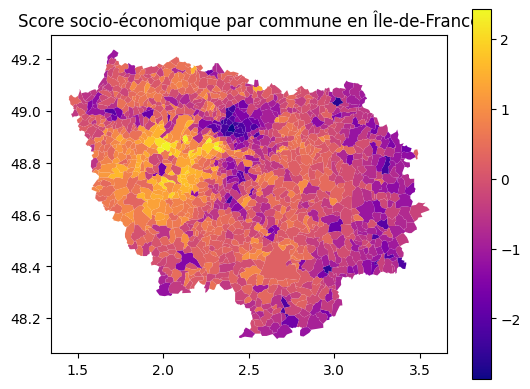

In [96]:
import geopandas as gpd
import matplotlib.pyplot as plt

idf_map = gpd.read_file(r"C:\Users\ACER\Downloads\communes-dile-de-france-au-01-janvier.shp")


idf_data = idf_map.merge(df, left_on="insee", right_on="INSEE_COM")

idf_data.plot(column="Score_total", cmap="plasma", legend=True)
plt.title("Score socio-économique par commune en Île-de-France")
plt.show()


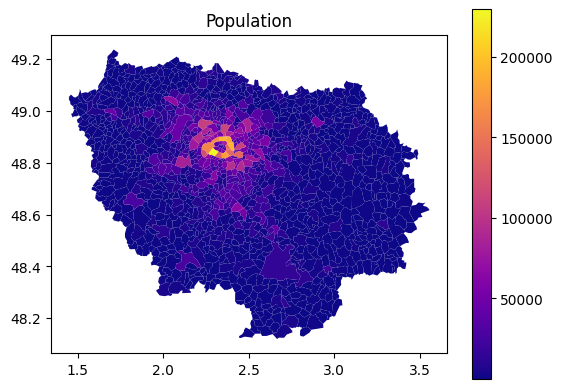

In [24]:
idf_data.plot(column="POP", cmap="plasma", legend=True)
plt.title("Population")
plt.show()


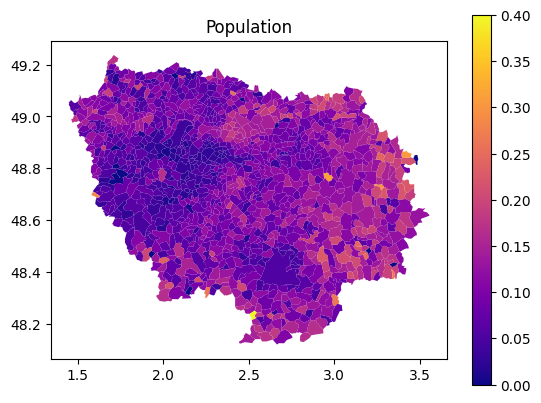

In [101]:
idf_data.plot(column="tx_O", cmap="plasma", legend=True)
plt.title("Population")
plt.show()

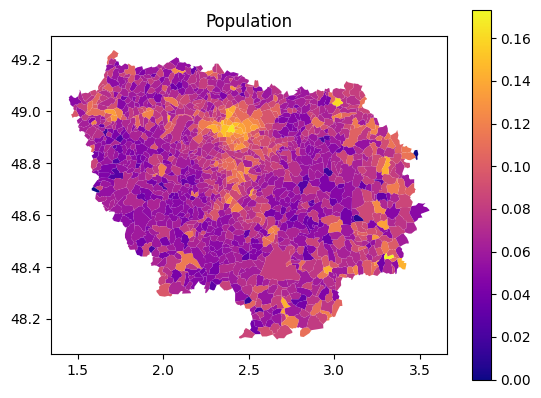

In [102]:
idf_data.plot(column="tx_Chom", cmap="plasma", legend=True)
plt.title("Population")
plt.show()

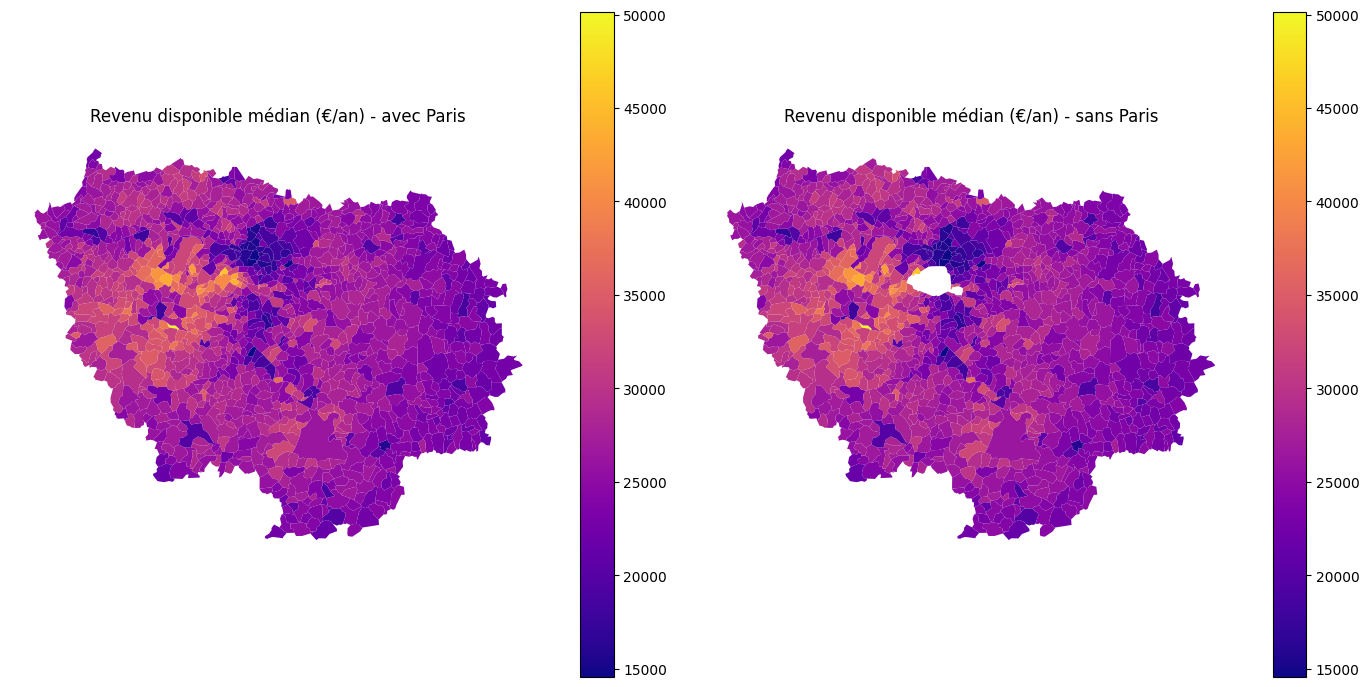

In [27]:
# Ép cột "insee" thành string để xử lý
idf_data["insee"] = idf_data["insee"].astype(str)

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Map có Paris
idf_data.plot(column="RDISP_MED", cmap="plasma", legend=True, ax=ax[0])
ax[0].set_title("Revenu disponible médian (€/an) - avec Paris")
ax[0].axis("off")

# Map bỏ Paris (lọc code bắt đầu bằng 75 = Paris)
idf_no_paris = idf_data[~idf_data["insee"].str.startswith("75")]

idf_no_paris.plot(column="RDISP_MED", cmap="plasma", legend=True, ax=ax[1])
ax[1].set_title("Revenu disponible médian (€/an) - sans Paris")
ax[1].axis("off")

plt.tight_layout()
plt.show()

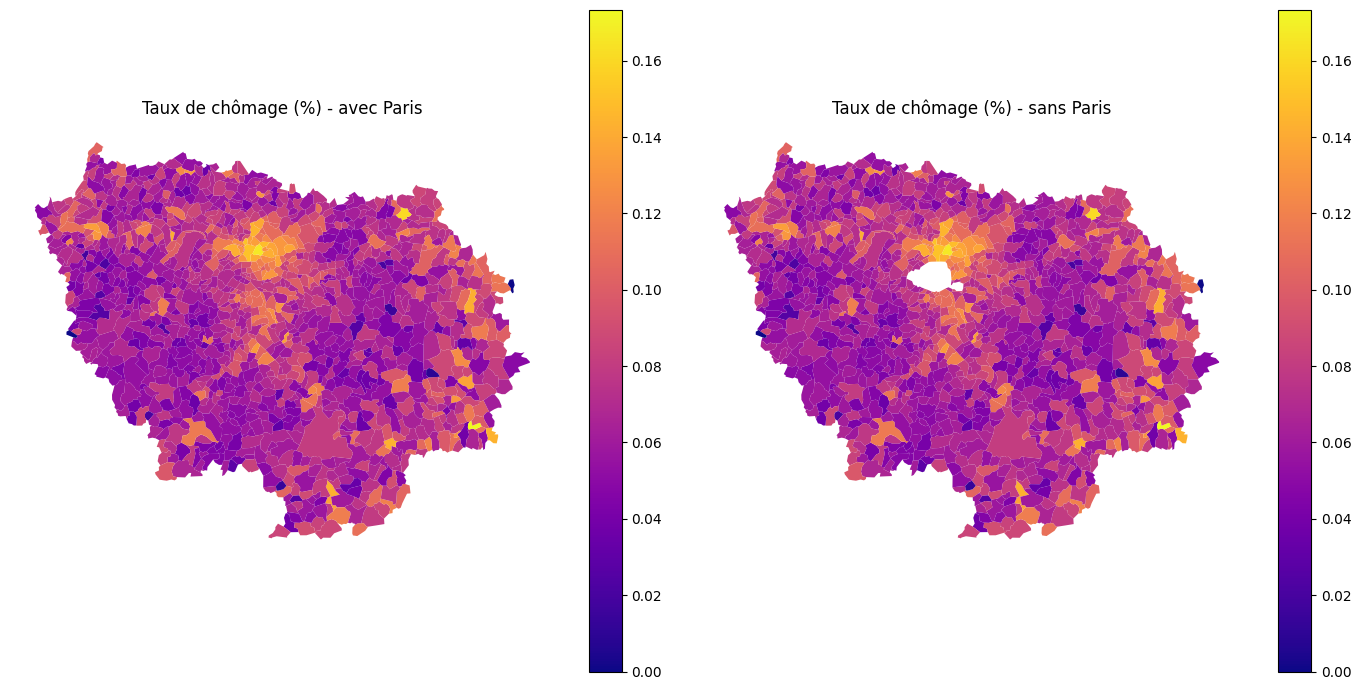

In [28]:
idf_data["insee"] = idf_data["insee"].astype(str)

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Map có Paris
idf_data.plot(column="tx_Chom", cmap="plasma", legend=True, ax=ax[0])
ax[0].set_title("Taux de chômage (%) - avec Paris")
ax[0].axis("off")

# Map bỏ Paris
idf_no_paris = idf_data[~idf_data["insee"].str.startswith("75")]
idf_no_paris.plot(column="tx_Chom", cmap="plasma", legend=True, ax=ax[1])
ax[1].set_title("Taux de chômage (%) - sans Paris")
ax[1].axis("off")

plt.tight_layout()
plt.show()

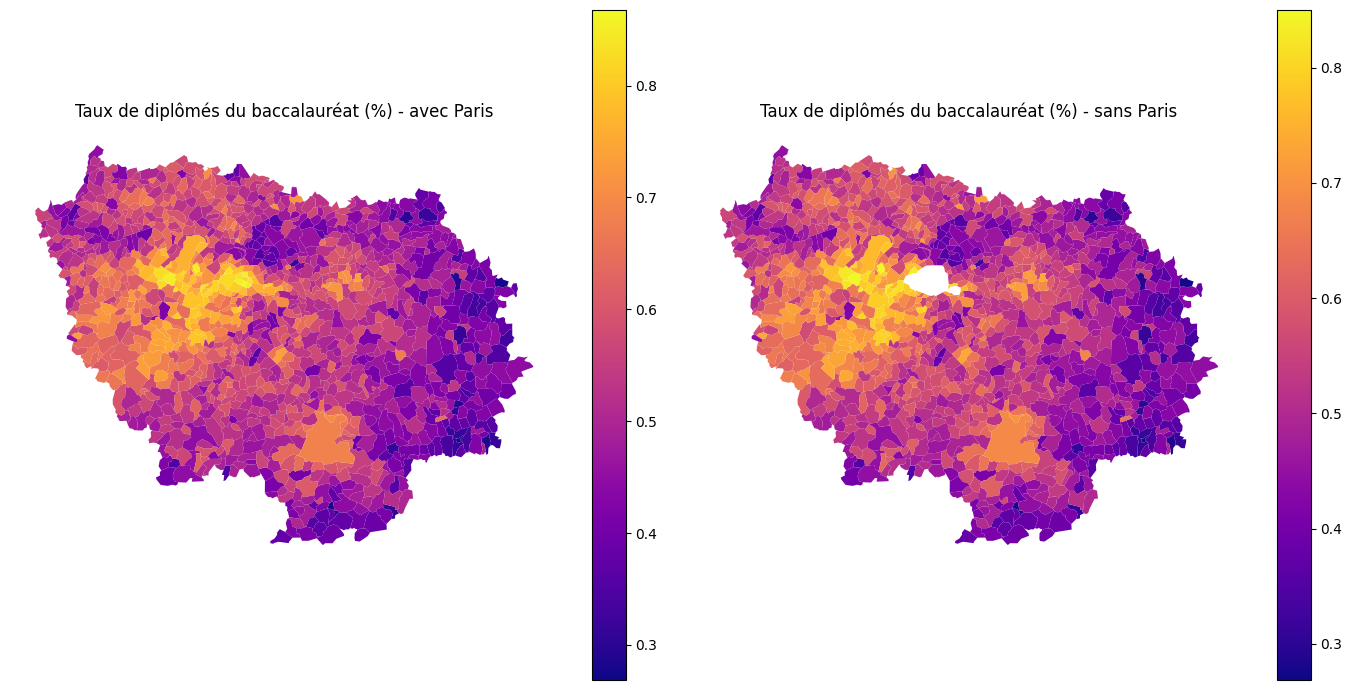

In [29]:
idf_data["insee"] = idf_data["insee"].astype(str)

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Map có Paris
idf_data.plot(column="tx_BAC", cmap="plasma", legend=True, ax=ax[0])
ax[0].set_title("Taux de diplômés du baccalauréat (%) - avec Paris")
ax[0].axis("off")

# Map bỏ Paris
idf_no_paris = idf_data[~idf_data["insee"].str.startswith("75")]
idf_no_paris.plot(column="tx_BAC", cmap="plasma", legend=True, ax=ax[1])
ax[1].set_title("Taux de diplômés du baccalauréat (%) - sans Paris")
ax[1].axis("off")

plt.tight_layout()
plt.show()

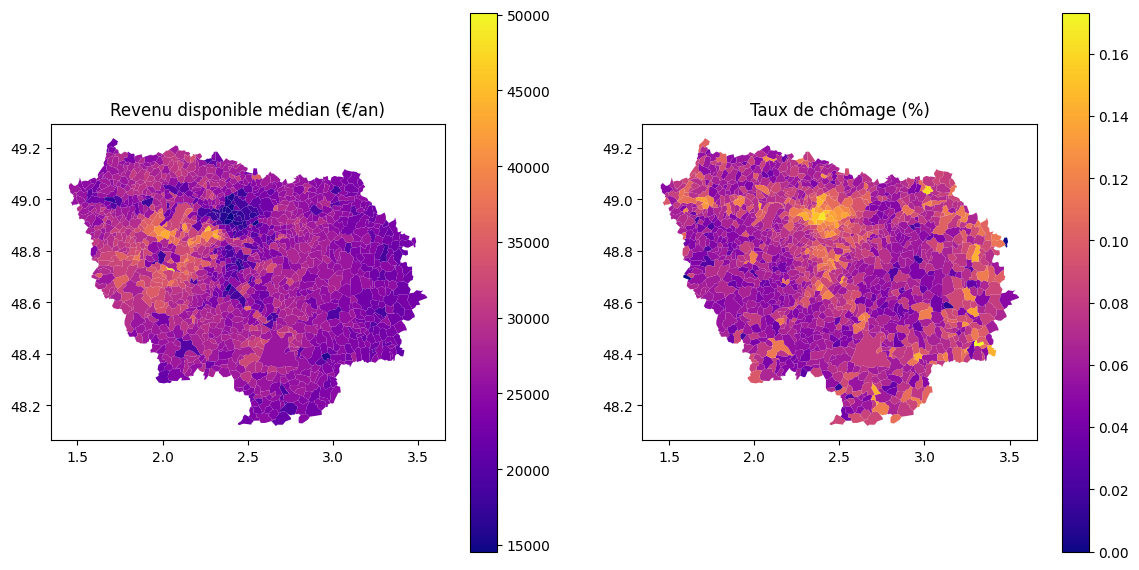

In [117]:
fig, axes = plt.subplots(1,2, figsize=(14,7))

idf_data.plot(column="RDISP_MED", cmap="plasma", legend=True, ax=axes[0])
axes[0].set_title("Revenu disponible médian (€/an)")

idf_data.plot(column="tx_Chom", cmap="plasma", legend=True, ax=axes[1])
axes[1].set_title("Taux de chômage (%)")

plt.show()


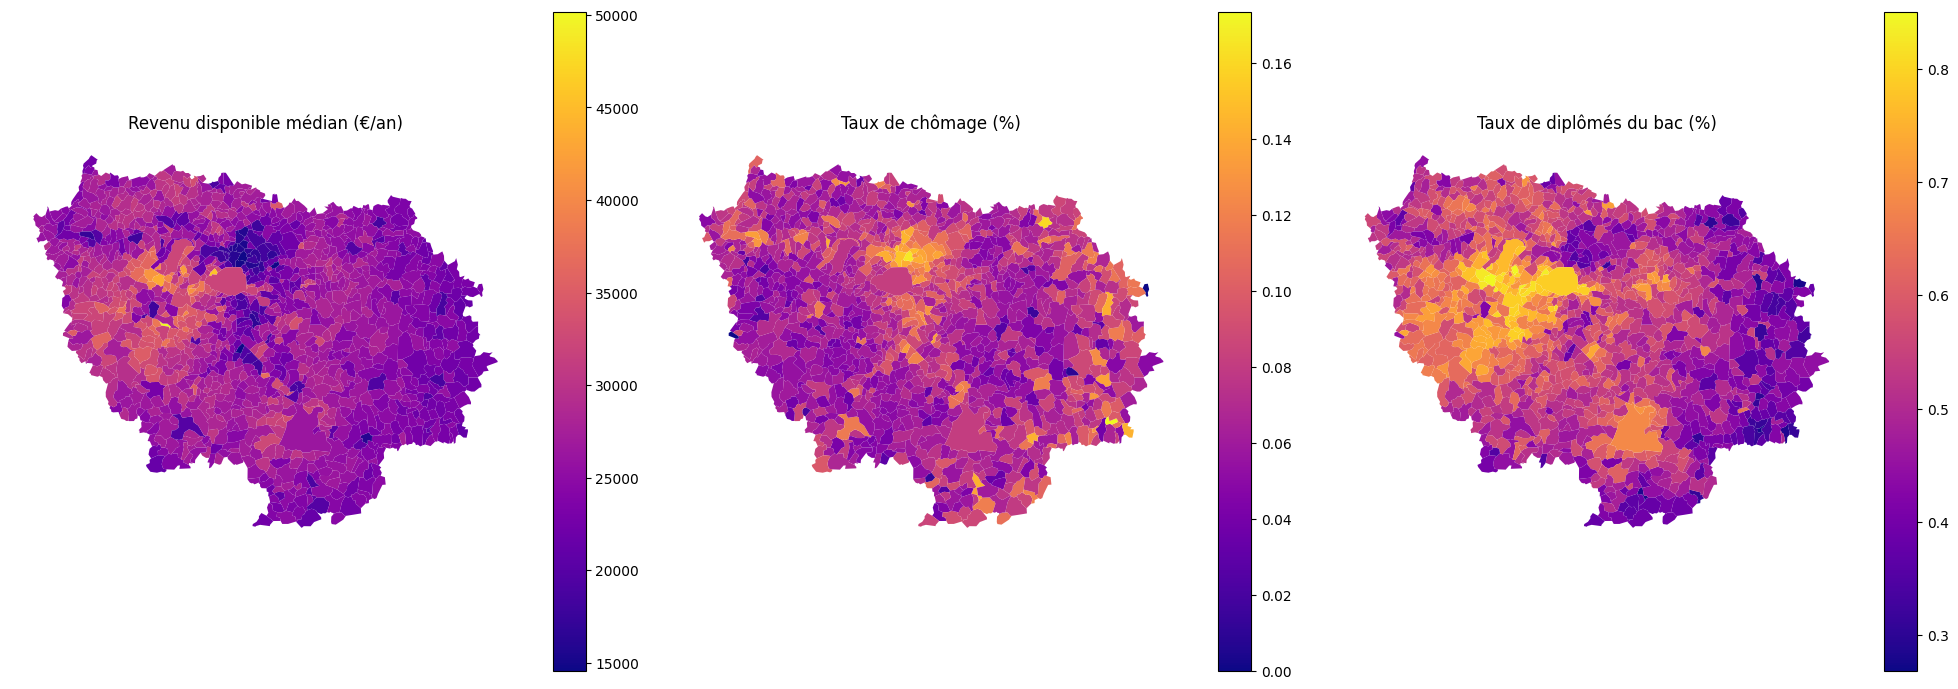

In [118]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Đảm bảo cột insee là string
idf_data["insee"] = idf_data["insee"].astype(str)

# --- Gom Paris (code bắt đầu bằng 75) ---
paris_union = idf_data[idf_data["insee"].str.startswith("75")].dissolve()

# Tính các chỉ số cho Paris (trung bình RDISP_MED, tx_Chom, tx_BAC)
paris_union["RDISP_MED"] = idf_data.loc[idf_data["insee"].str.startswith("75"), "RDISP_MED"].mean()
paris_union["tx_Chom"]   = idf_data.loc[idf_data["insee"].str.startswith("75"), "tx_Chom"].mean()
paris_union["tx_BAC"]    = idf_data.loc[idf_data["insee"].str.startswith("75"), "tx_BAC"].mean()
paris_union["insee"]     = "75"

# Tạo dataset mới = toàn IDF (không Paris) + Paris gom lại
idf_no_paris = idf_data[~idf_data["insee"].str.startswith("75")]
idf_combined = pd.concat([idf_no_paris, paris_union])

# --- Vẽ 3 bản đồ cạnh nhau ---
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

idf_combined.plot(column="RDISP_MED", cmap="plasma", legend=True, ax=axes[0])
axes[0].set_title("Revenu disponible médian (€/an)")
axes[0].axis("off")

idf_combined.plot(column="tx_Chom", cmap="plasma", legend=True, ax=axes[1])
axes[1].set_title("Taux de chômage (%)")
axes[1].axis("off")

idf_combined.plot(column="tx_BAC", cmap="plasma", legend=True, ax=axes[2])
axes[2].set_title("Taux de diplômés du bac (%)")
axes[2].axis("off")

plt.tight_layout()
plt.show()


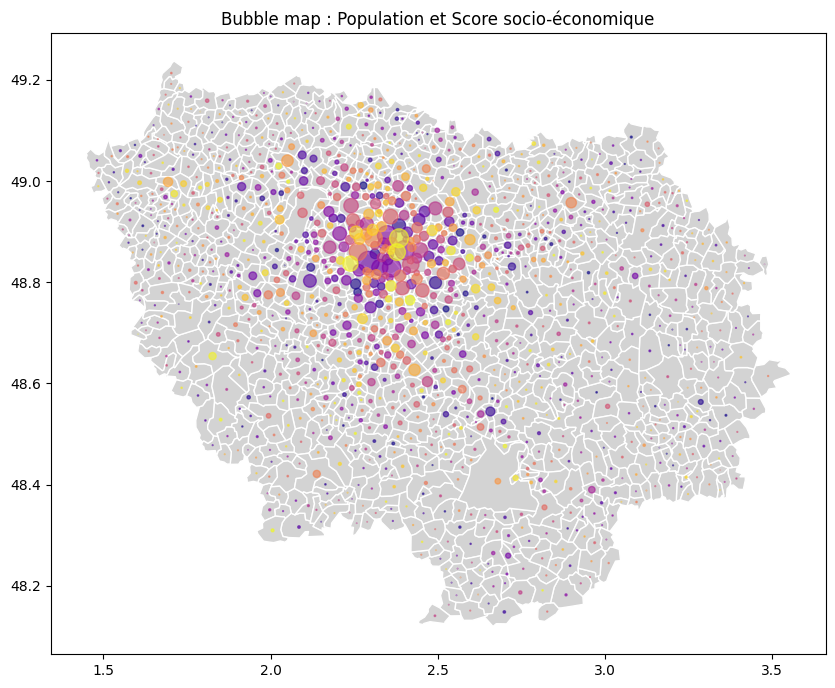

In [58]:
idf_data["centroid"] = idf_data.geometry.centroid
idf_data_points = idf_data.copy()
idf_data_points.set_geometry("centroid", inplace=True)

base = idf_data.plot(color="lightgrey", edgecolor="white", figsize=(10,10))
idf_data_points.plot(ax=base,
                     markersize=idf_data_points["POP"]/1000,
                     c=idf_data_points["Score_total"],
                     cmap="plasma", alpha=0.6, legend=True)
plt.title("Bubble map : Population et Score socio-économique")
plt.show()


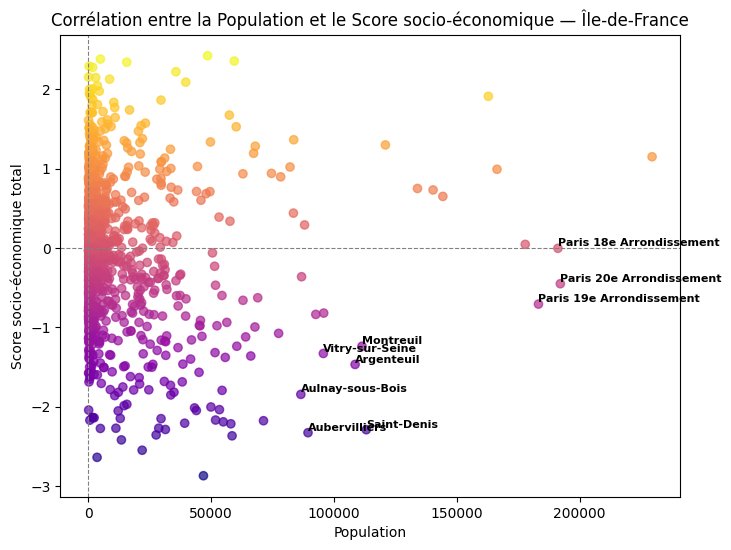

In [212]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
sc = ax.scatter(
    idf_data["POP"], idf_data["Score_total"],
    c=idf_data["Score_total"], cmap="plasma", alpha=0.7
)

# Điều kiện chọn những điểm nổi bật (ví dụ như bạn đã khoanh)
highlight = idf_data[
    ((idf_data["POP"] > 80000) & (idf_data["Score_total"] < -1)) |  # dân số cao, điểm thấp
    ((idf_data["POP"] > 150000) & (idf_data["Score_total"] < 0))    # hoặc dân số rất cao, điểm hơi thấp
]

# Hiện tên cho những điểm đó
for _, row in highlight.iterrows():
    ax.text(row["POP"], row["Score_total"], row["NOM"],
            fontsize=8, color="black", fontweight="bold",
            ha="left", va="bottom")

# Vẽ lại scatter tổng thể
ax.set_title("Corrélation entre la Population et le Score socio-économique — Île-de-France")
ax.set_xlabel("Population")
ax.set_ylabel("Score socio-économique total")
ax.axhline(0, color="grey", lw=0.8, linestyle="--")
ax.axvline(0, color="grey", lw=0.8, linestyle="--")

plt.show()


In [59]:
idf_data["Score_class"] = pd.qcut(
    idf_data["Score_total"], 
    q=5, 
    labels=["Très bas", "Bas", "Moyen", "Haut", "Très haut"]
)


In [60]:
# Loại bỏ các cột có kiểu Point (như centroid)
idf_poly = idf_data.copy()
idf_poly = idf_poly[~idf_poly.geometry.geom_type.isin(["Point", "MultiPoint"])]


In [65]:
idf_data.geometry.geom_type.value_counts()


Polygon    1287
Name: count, dtype: int64

In [1]:
import geopandas as gpd

idf_poly = idf_data[
    idf_data.geometry.type.isin(["Polygon", "MultiPolygon"])
].copy()

# Nếu vẫn còn GeometryCollection có Point bên trong → tách riêng Polygon
idf_poly["geometry"] = idf_poly["geometry"].apply(
    lambda g: g if g.geom_type in ["Polygon", "MultiPolygon"]
    else None
)

# Xoá dòng geometry bị None hoặc rỗng
idf_poly = idf_poly[idf_poly.geometry.notnull() & ~idf_poly.geometry.is_empty]

# Chuyển sang WGS84 (lat/lon)
idf_poly = idf_poly.to_crs(epsg=4326)


NameError: name 'idf_data' is not defined

In [17]:
import pandas as pd
import eurostat

# Lấy dữ liệu GDP regional
dataset_code = "nama_10r_3gdp"
gdp = eurostat.get_data_df(dataset_code)

# Đổi tên cột "geo\\TIME_PERIOD" thành "geo"
gdp = gdp.rename(columns={"geo\\TIME_PERIOD": "geo"})

# Chuyển từ wide -> long
gdp_long = gdp.melt(
    id_vars=["freq","unit","geo"], 
    var_name="TIME_PERIOD", 
    value_name="values"
)

# Chỉ lấy unit = EUR_HAB (GDP per capita)
idf_codes = ["FR101","FR102","FR103","FR104","FR105","FR106","FR107","FR108"]
idf_gdp = gdp_long[
    (gdp_long["unit"]=="EUR_HAB") & 
    (gdp_long["geo"].isin(idf_codes))
][["geo","TIME_PERIOD","values"]]

# Chuyển TIME_PERIOD về số
idf_gdp["TIME_PERIOD"] = pd.to_numeric(idf_gdp["TIME_PERIOD"])
idf_gdp = idf_gdp.dropna()

print(idf_gdp.head())


       geo  TIME_PERIOD   values
892  FR101         2000  72300.0
893  FR102         2000  20400.0
894  FR103         2000  29100.0
895  FR104         2000  26200.0
896  FR105         2000  66100.0


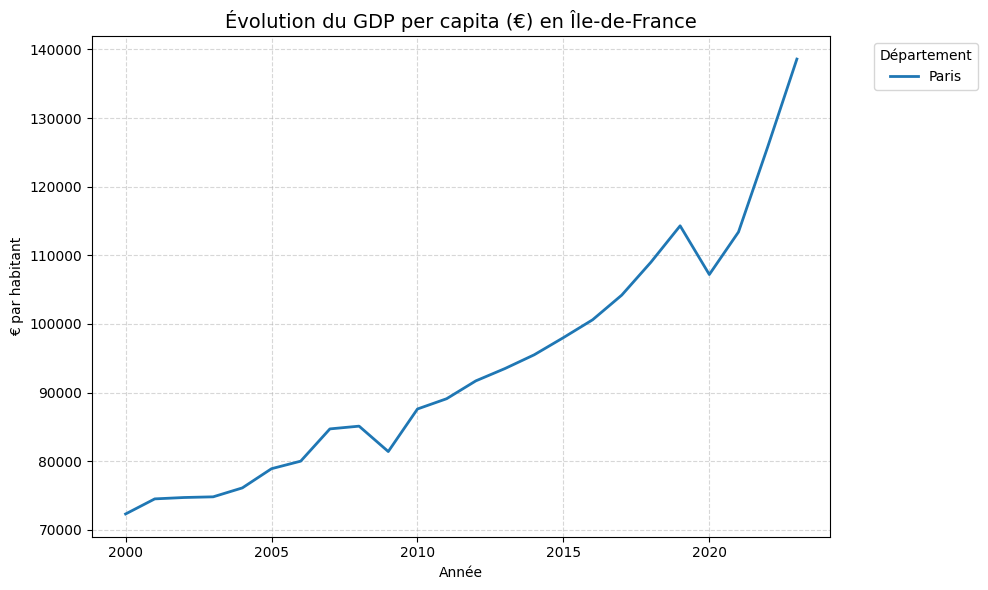

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gắn nhãn tên cho 8 vùng IDF
idf_labels = {
    "FR101": "Paris",
   
}

idf_gdp["departement"] = idf_gdp["geo"].map(idf_labels)

# Vẽ line chart
plt.figure(figsize=(10,6))
sns.lineplot(
    data=idf_gdp,
    x="TIME_PERIOD",
    y="values",
    hue="departement",
    linewidth=2
)

plt.title("Évolution du GDP per capita (€) en Île-de-France", fontsize=14)
plt.xlabel("Année")
plt.ylabel("€ par habitant")
plt.legend(title="Département", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\l

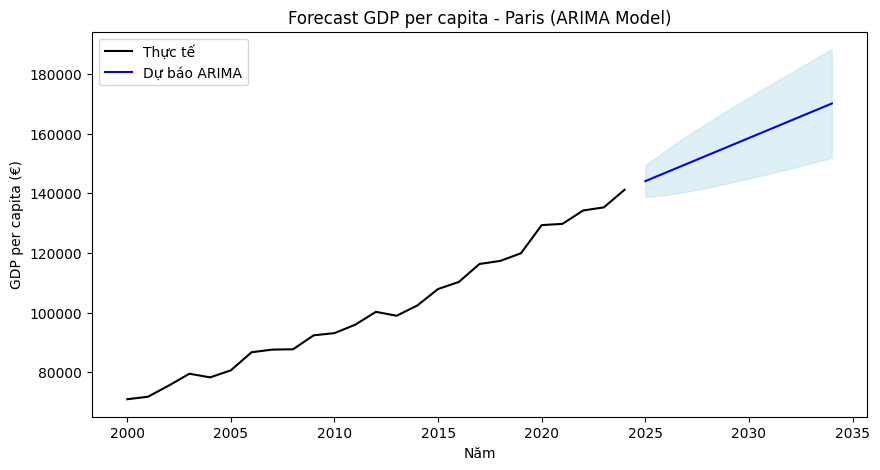

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# === 1. Tạo dữ liệu mẫu ===
years = np.arange(2000, 2025)
np.random.seed(42)

base = 70000
growth_rate = 0.03
noise = np.random.normal(0, 2000, len(years))
gdp = base * (1 + growth_rate) ** (years - 2000) + noise

df = pd.DataFrame({'Year': years, 'GDP_per_capita': gdp}).set_index('Year')

# === 2. Huấn luyện mô hình ARIMA ===
model = ARIMA(df['GDP_per_capita'], order=(1, 1, 1))
model_fit = model.fit()

# === 3. Dự báo 10 năm tiếp theo ===
forecast = model_fit.get_forecast(steps=10)
forecast_index = np.arange(2025, 2035)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# === 4. Vẽ kết quả ===
plt.figure(figsize=(10,5))
plt.plot(df.index, df['GDP_per_capita'], label='Thực tế', color='black')
plt.plot(forecast_index, forecast_mean, label='Dự báo ARIMA', color='blue')
plt.fill_between(forecast_index,
                 forecast_ci['lower GDP_per_capita'],
                 forecast_ci['upper GDP_per_capita'],
                 color='lightblue', alpha=0.4)
plt.title("Forecast GDP per capita - Paris (ARIMA Model)")
plt.xlabel("Năm")
plt.ylabel("GDP per capita (€)")
plt.legend()
plt.show()


C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python3

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=448.860, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=452.642, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=449.717, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=466.890, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=451.439, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.109 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -222.430
Date:                Sat, 04 Oct 2025   AIC                            448.860
Time:                        23:32:31   BIC                            451.216
Sample:                             0   HQIC                           449.485
                                 - 25                                         
Co

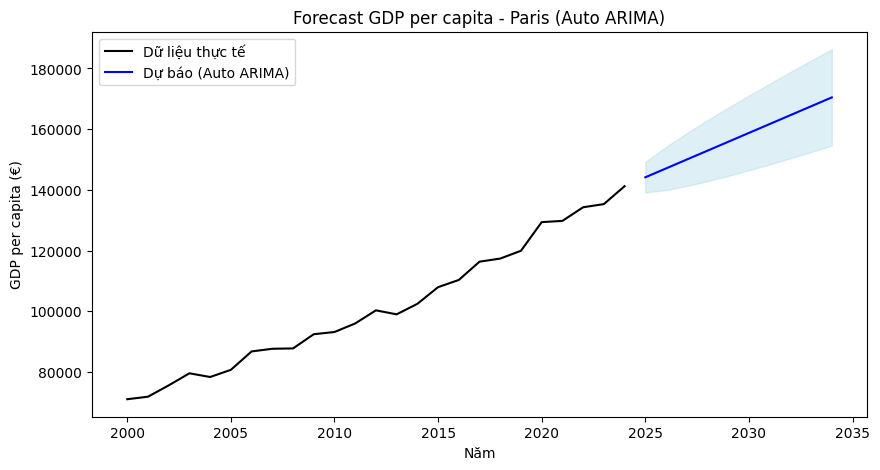

In [2]:
# Cài đặt thư viện nếu cần
# !pip install pandas matplotlib pmdarima numpy==1.26.4 scipy==1.11.4 statsmodels==0.14.1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# === 1. TẠO DỮ LIỆU GIẢ LẬP GDP PARIS 2000–2024 ===
years = np.arange(2000, 2025)
np.random.seed(42)

base = 70000
growth_rate = 0.03
noise = np.random.normal(0, 2000, len(years))
gdp = base * (1 + growth_rate) ** (years - 2000) + noise

df = pd.DataFrame({'Year': years, 'GDP_per_capita': gdp}).set_index('Year')

# === 2. CHỌN MÔ HÌNH TỐI ƯU TỰ ĐỘNG (AUTO ARIMA) ===
model = auto_arima(df['GDP_per_capita'],
                   start_p=0, start_q=0,
                   max_p=3, max_q=3,
                   seasonal=False,
                   stepwise=True,
                   trace=True)

print(model.summary())

# === 3. DỰ BÁO 10 NĂM TIẾP THEO ===
n_years = 10
forecast, conf_int = model.predict(n_periods=n_years, return_conf_int=True)
forecast_index = np.arange(df.index[-1] + 1, df.index[-1] + n_years + 1)

# === 4. VẼ BIỂU ĐỒ ===
plt.figure(figsize=(10,5))
plt.plot(df.index, df['GDP_per_capita'], label='Dữ liệu thực tế', color='black')
plt.plot(forecast_index, forecast, label='Dự báo (Auto ARIMA)', color='blue')
plt.fill_between(forecast_index,
                 conf_int[:, 0], conf_int[:, 1],
                 color='lightblue', alpha=0.4)
plt.title("Forecast GDP per capita - Paris (Auto ARIMA)")
plt.xlabel("Năm")
plt.ylabel("GDP per capita (€)")
plt.legend()
plt.show()


In [135]:
# Tạo df_score từ dữ liệu đã có
df_score = idf_data[["INSEE_COM", "NOM", "Score_total"]].copy()
df_score.head()


,INSEE_COM,NOM,Score_total
0,95203,Eaubonne,0.227552
1,91319,Janvry,0.728727
2,77148,Crouy-sur-Ourcq,-0.978490
3,77219,Guérard,0.264973
4,91468,Ormoy,-0.097362


In [122]:
# Giữ lại các cột quan trọng từ dữ liệu GDP
df_gdp = idf_gdp[["geo", "TIME_PERIOD", "values"]].copy()
df_gdp.rename(columns={"geo": "INSEE_COM", "values": "GDP_per_capita"}, inplace=True)
df_gdp.head()


,INSEE_COM,TIME_PERIOD,GDP_per_capita
892,FR101,2000-01-01,72300.0
893,FR102,2000-01-01,20400.0
894,FR103,2000-01-01,29100.0
895,FR104,2000-01-01,26200.0
896,FR105,2000-01-01,66100.0


In [143]:
print(df_score)

      INSEE_COM                       NOM  Score_total DEP   NUTS  \
0         95203                  Eaubonne     0.227552  95  FR108   
1         91319                    Janvry     0.728727  91  FR104   
2         77148           Crouy-sur-Ourcq    -0.978490  77  FR102   
3         77219                   Guérard     0.264973  77  FR102   
4         91468                     Ormoy    -0.097362  91  FR104   
...         ...                       ...          ...  ..    ...   
1282      77141               Coutevroult     0.481343  77  FR102   
1283      78382                Maurecourt     0.413771  78  FR103   
1284      91016                Angerville    -1.207834  91  FR104   
1285      94022             Choisy-le-Roi    -1.111715  94  FR107   
1286      75111  Paris 11e Arrondissement     0.650641  75  FR101   

         departement  
0         Val-d’Oise  
1            Essonne  
2     Seine-et-Marne  
3     Seine-et-Marne  
4            Essonne  
...              ...  
1282  Sein

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Tạo bảng ánh xạ từ code département (2 số đầu của INSEE) sang vùng NUTS
commune_to_nuts = pd.DataFrame({
    "DEP": ["75","77","78","91","92","93","94","95"],
    "NUTS": ["FR101","FR102","FR103","FR104","FR105","FR106","FR107","FR108"],
    "departement": ["Paris","Seine-et-Marne","Yvelines","Essonne",
                    "Hauts-de-Seine","Seine-Saint-Denis","Val-de-Marne","Val-d’Oise"]
})

In [140]:
# 2️⃣ Thêm cột DEP (mã 2 chữ số đầu) vào df_score
df_score["DEP"] = df_score["INSEE_COM"].astype(str).str[:2]

In [142]:
# 3️⃣ Ghép commune vào vùng lớn
df_score = df_score.merge(commune_to_nuts, on="DEP", how="left")

In [145]:
# 4️⃣ Tính trung bình Score_total theo vùng
idf_score_agg = (
    df_score.groupby(["NUTS", "departement"], as_index=False)
    .agg(mean_score=("Score_total", "mean"))
)
print(idf_score_agg)

    NUTS        departement  mean_score
0  FR101              Paris    1.006622
1  FR102     Seine-et-Marne   -0.288775
2  FR103           Yvelines    0.542028
3  FR104            Essonne    0.172005
4  FR105     Hauts-de-Seine    0.650091
5  FR106  Seine-Saint-Denis   -1.393019
6  FR107       Val-de-Marne   -0.219425
7  FR108         Val-d’Oise   -0.026344


In [147]:
# 5️⃣ Chọn dữ liệu GDP mới nhất (nếu có nhiều năm)
idf_gdp_latest = (
    idf_gdp.sort_values("TIME_PERIOD", ascending=False)
    .groupby("geo", as_index=False)
    .first()
)
print(idf_gdp_latest)

     geo TIME_PERIOD    values        departement
0  FR101  2023-01-01  138600.0              Paris
1  FR102  2023-01-01   35500.0     Seine-et-Marne
2  FR103  2023-01-01   43500.0           Yvelines
3  FR104  2023-01-01   48500.0            Essonne
4  FR105  2023-01-01  122100.0     Hauts-de-Seine
5  FR106  2023-01-01   46200.0  Seine-Saint-Denis
6  FR107  2023-01-01   45600.0       Val-de-Marne
7  FR108  2023-01-01   33500.0         Val-d’Oise


In [149]:
# 6️⃣ Nối GDP và Score_total trung bình theo vùng
idf_compare = idf_gdp_latest.merge(
    idf_score_agg,
    left_on="geo",
    right_on="NUTS",
    how="left"
)
print(idf_compare)

     geo TIME_PERIOD    values      departement_x   NUTS      departement_y  \
0  FR101  2023-01-01  138600.0              Paris  FR101              Paris   
1  FR102  2023-01-01   35500.0     Seine-et-Marne  FR102     Seine-et-Marne   
2  FR103  2023-01-01   43500.0           Yvelines  FR103           Yvelines   
3  FR104  2023-01-01   48500.0            Essonne  FR104            Essonne   
4  FR105  2023-01-01  122100.0     Hauts-de-Seine  FR105     Hauts-de-Seine   
5  FR106  2023-01-01   46200.0  Seine-Saint-Denis  FR106  Seine-Saint-Denis   
6  FR107  2023-01-01   45600.0       Val-de-Marne  FR107       Val-de-Marne   
7  FR108  2023-01-01   33500.0         Val-d’Oise  FR108         Val-d’Oise   

   mean_score  
0    1.006622  
1   -0.288775  
2    0.542028  
3    0.172005  
4    0.650091  
5   -1.393019  
6   -0.219425  
7   -0.026344  


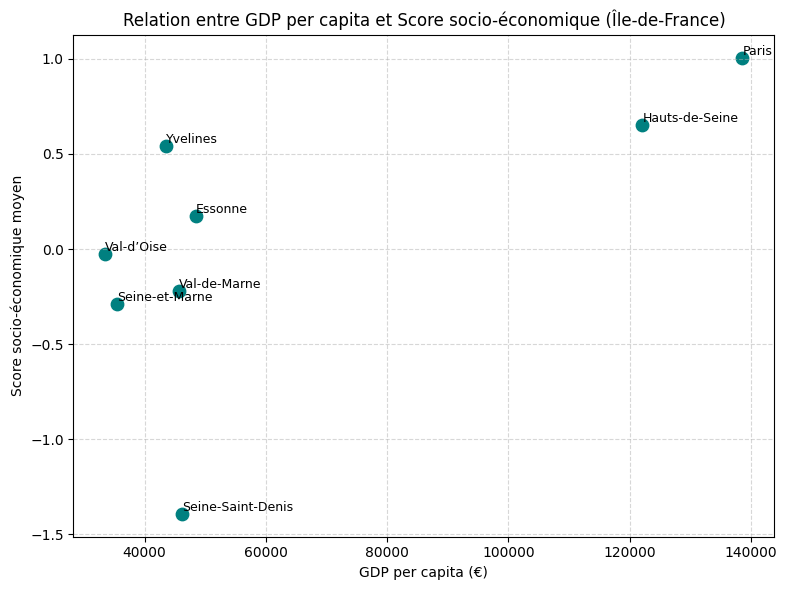

In [152]:
# 7️⃣ Vẽ biểu đồ scatter
plt.figure(figsize=(8,6))
plt.scatter(idf_compare["values"], idf_compare["mean_score"], color="teal", s=80)

# Thêm tên vùng
for _, row in idf_compare.iterrows():
    plt.text(row["values"], row["mean_score"], row["departement_x"], fontsize=9, ha='left', va='bottom')

plt.xlabel("GDP per capita (€)")
plt.ylabel("Score socio-économique moyen")
plt.title("Relation entre GDP per capita et Score socio-économique (Île-de-France)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [153]:
corr = idf_compare["values"].corr(idf_compare["mean_score"])
print(f"📊 Corrélation GDP - Score_total = {corr:.2f}")


📊 Corrélation GDP - Score_total = 0.64
